In [ ]:
# Ahmed haytham naga-1301359-t9
# Anthony Shady michel-13003387-t15
# Yasin amr mansour-13003003-t12

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
df = pd.read_csv('loan_approval_dataset.csv')

In [ ]:
# Display first and last 12 rows
first_12 = df.head(12)
last_12 = df.tail(12)
print(first_12)
print(last_12)


    Applicant_ID  Age  Income  Credit_Score  Loan_Amount  Loan_Term  \
0              1   56   21920           639       452748         72   
1              2   69  126121           655       257134         60   
2              3   46   96872           467       226437         72   
3              4   32  101132           751       310480         12   
4              5   60   22093           404        13070         12   
5              6   25   32905           449         6320         24   
6              7   38  141759           445       356187         72   
7              8   56  175423           598       306065         24   
8              9   36   50981           466        11589         24   
9             10   40   93903           347       462625         48   
10            11   28   90821           538       360139         60   
11            12   28  129200           306        20589         36   

    Interest_Rate Employment_Status  Debt_to_Income_Ratio Marital_Status  \


In [ ]:
# Dataset information
print("Total Rows & Columns:", df.shape)



Total Rows & Columns: (5000, 14)


In [ ]:
print("Column Names & Data Types:")
print(df.dtypes)


Column Names & Data Types:
Applicant_ID              int64
Age                       int64
Income                    int64
Credit_Score              int64
Loan_Amount               int64
Loan_Term                 int64
Interest_Rate           float64
Employment_Status        object
Debt_to_Income_Ratio    float64
Marital_Status           object
Number_of_Dependents      int64
Property_Ownership       object
Loan_Purpose             object
Previous_Defaults         int64
dtype: object


In [ ]:
print("First Column Name:", df.columns[0])

First Column Name: Applicant_ID


In [ ]:
# Dataset summary
info = df.info()
description = df.describe()
print(info)
print(description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Applicant_ID          5000 non-null   int64  
 1   Age                   5000 non-null   int64  
 2   Income                5000 non-null   int64  
 3   Credit_Score          5000 non-null   int64  
 4   Loan_Amount           5000 non-null   int64  
 5   Loan_Term             5000 non-null   int64  
 6   Interest_Rate         5000 non-null   float64
 7   Employment_Status     5000 non-null   object 
 8   Debt_to_Income_Ratio  5000 non-null   float64
 9   Marital_Status        5000 non-null   object 
 10  Number_of_Dependents  5000 non-null   int64  
 11  Property_Ownership    5000 non-null   object 
 12  Loan_Purpose          5000 non-null   object 
 13  Previous_Defaults     5000 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 547.0+ KB
None
       A

In [ ]:
# Choose a categorical column
print(f"distinct values of Property Ownership is {df['Property_Ownership'].nunique()}")

distinct values of Property Ownership is 3


In [ ]:
print(f"most frequently occurring value in Property Ownership \n{df['Property_Ownership'].mode()}")

most frequently occurring value in Property Ownership 
0    Own
Name: Property_Ownership, dtype: object


In [ ]:
# Statistical measures
df.describe()

,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Debt_to_Income_Ratio,Number_of_Dependents,Previous_Defaults
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.584600,110220.247000,574.183200,252118.47900,41.769600,8.873018,27.177244,2.010200,0.099400
std,1443.520003,14.919094,52075.384023,160.437715,142580.00452,20.598868,3.622642,12.888572,1.398459,0.299228
min,1.000000,18.000000,20028.000000,300.000000,5050.00000,12.000000,2.500000,5.000000,0.000000,0.000000
25%,1250.750000,31.000000,64751.000000,434.750000,129940.25000,24.000000,5.790000,16.030000,1.000000,0.000000
50%,2500.500000,43.000000,110180.500000,573.000000,250846.50000,36.000000,8.900000,27.220000,2.000000,0.000000
75%,3750.250000,56.000000,155749.750000,715.000000,378021.75000,60.000000,11.970000,38.235000,3.000000,0.000000
max,5000.000000,69.000000,199992.000000,849.000000,499651.00000,72.000000,15.000000,49.990000,4.000000,1.000000


In [ ]:
# Data Filtering
print(df[df["Age"]>65])

      Applicant_ID  Age  Income  Credit_Score  Loan_Amount  Loan_Term  \
1                2   69  126121           655       257134         60   
30              31   66   30278           501       461201         48   
37              38   68  123423           500       118436         72   
39              40   69   80128           846       288303         24   
42              43   68  172353           692        29003         72   
...            ...  ...     ...           ...          ...        ...   
4923          4924   66   41390           444        14864         48   
4925          4926   66  163953           650       229589         24   
4981          4982   68  188651           394       482932         48   
4992          4993   66   98199           420       103039         36   
4996          4997   66  162728           829        15886         24   

      Interest_Rate Employment_Status  Debt_to_Income_Ratio Marital_Status  \
1              5.38        Unemployed        

In [ ]:
# Identify records where a column starts with a letter
letter_filter = df[df["Property_Ownership"].str.startswith("O", na=False)]
letter_filter_count = len(letter_filter)
print(letter_filter)
print("Records starting with 'O':", letter_filter_count)

      Applicant_ID  Age  Income  Credit_Score  Loan_Amount  Loan_Term  \
5                6   25   32905           449         6320         24   
9               10   40   93903           347       462625         48   
11              12   28  129200           306        20589         36   
14              15   57   98513           670        65840         36   
16              17   20  158746           786       103704         36   
...            ...  ...     ...           ...          ...        ...   
4990          4991   45  121505           680       401792         60   
4992          4993   66   98199           420       103039         36   
4996          4997   66  162728           829        15886         24   
4997          4998   26  166965           468       477830         48   
4999          5000   36  154704           336       183308         36   

      Interest_Rate Employment_Status  Debt_to_Income_Ratio Marital_Status  \
5              7.46        Unemployed        

In [ ]:
# Remove duplicates
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print("Total Duplicates:", duplicates)

Total Duplicates: 0


In [ ]:
# Convert numerical column to string
df["Applicant_ID"] = df["Applicant_ID"].astype(str)
print(df["Applicant_ID"].dtype)


object


In [ ]:
# Grouping
grouped_df = df.groupby(['Property_Ownership', 'Employment_Status'])
grouped_df.describe()

Age                                    \
                                      count       mean        std   min   25%   
Property_Ownership Employment_Status                                            
Mortgage           Employed           566.0  44.736749  14.411019  18.0  33.0   
                   Self-Employed      588.0  43.234694  14.996400  18.0  31.0   
                   Unemployed         514.0  43.344358  14.811094  18.0  31.0   
Own                Employed           554.0  43.447653  15.031551  18.0  31.0   
                   Self-Employed      596.0  42.241611  14.884610  18.0  29.0   
                   Unemployed         532.0  43.783835  15.154704  18.0  30.0   
Rent               Employed           546.0  44.377289  15.156933  18.0  32.0   
                   Self-Employed      539.0  43.916512  14.950056  18.0  31.0   
                   Unemployed         565.0  43.293805  14.839880  18.0  31.0   

                                                       Income                 \
                                       50%   75%   max  count           mean   
Property_Ownership Employment_Status                                           
Mortgage           Employed           46.0  56.0  69.0  566.0  115354.079505   
                   Self-Employed      43.0  56.0  69.0  588.0  109286.517007   
                   Unemployed         44.0  56.0  69.0  514.0  105680.951362   
Own                Employed           44.0  56.0  69.0  554.0  109349.767148   
                   Self-Employed      41.0  55.0  69.0  596.0  113684.206376   
                   Unemployed         44.0  57.0  69.0  532.0  109750.028195   
Rent               Employed           45.0  58.0  69.0  546.0  108698.031136   
                   Self-Employed      43.0  57.0  69.0  539.0  108569.350649   
                   Unemployed         43.0  56.0  69.0  565.0  110866.844248   

                                      ... Number_of_Dependents       \
                                      ...                  75%  max   
Property_Ownership Employment_Status  ...                             
Mortgage           Employed           ...                  3.0  4.0   
                   Self-Employed      ...                  3.0  4.0   
                   Unemployed         ...                  3.0  4.0   
Own                Employed           ...                  3.0  4.0   
                   Self-Employed      ...                  3.0  4.0   
                   Unemployed         ...                  3.0  4.0   
Rent               Employed           ...                  3.0  4.0   
                   Self-Employed      ...                  3.0  4.0   
                   Unemployed         ...                  3.0  4.0   

                                     Previous_Defaults                      \
                                                 count      mean       std   
Property_Ownership Employment_Status                                         
Mortgage           Employed                      566.0  0.114841  0.319112   
                   Self-Employed                 588.0  0.081633  0.274037   
                   Unemployed                    514.0  0.083658  0.277143   
Own                Employed                      554.0  0.090253  0.286802   
                   Self-Employed                 596.0  0.124161  0.330042   
                   Unemployed                    532.0  0.080827  0.272826   
Rent               Employed                      546.0  0.097070  0.296324   
                   Self-Employed                 539.0  0.103896  0.305409   
                   Unemployed                    565.0  0.115044  0.319358   

                                                               
                                      min  25%  50%  75%  max  
Property_Ownership Employment_Status                           
Mortgage           Employed           0.0  0.0  0.0  0.0  1.0  
                   Self-Employed      0.0  0.0  0.0  0.0  1.

In [ ]:
# Missing Values Handling
missing_values = df.isnull().sum()
print(missing_values)

Applicant_ID            0
Age                     0
Income                  0
Credit_Score            0
Loan_Amount             0
Loan_Term               0
Interest_Rate           0
Employment_Status       0
Debt_to_Income_Ratio    0
Marital_Status          0
Number_of_Dependents    0
Property_Ownership      0
Loan_Purpose            0
Previous_Defaults       0
dtype: int64


In [ ]:
#replacing missing values with mean or mode
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column] = df[column].fillna(df[column].median())
    else:
        df[column] = df[column].fillna(df[column].mode()[0])

In [ ]:
# Binning
df['binned'] = pd.qcut(pd.to_numeric(df['Age']), q=5)
bin_counts = df['binned'].value_counts()
print(bin_counts)

binned
(28.0, 39.0]      1048
(17.999, 28.0]    1039
(49.0, 59.0]       990
(39.0, 49.0]       972
(59.0, 69.0]       951
Name: count, dtype: int64


In [ ]:
# Maximum value row
max_row = df.loc[df['Income'].idxmax()]
print("Row with Maximum Value:")
print(max_row)

Row with Maximum Value:
Applicant_ID                      708
Age                                48
Income                         199992
Credit_Score                      469
Loan_Amount                    352364
Loan_Term                          12
Interest_Rate                    12.7
Employment_Status       Self-Employed
Debt_to_Income_Ratio            33.71
Marital_Status                 Single
Number_of_Dependents                1
Property_Ownership                Own
Loan_Purpose                      Car
Previous_Defaults                   0
binned                   (39.0, 49.0]
Name: 707, dtype: object


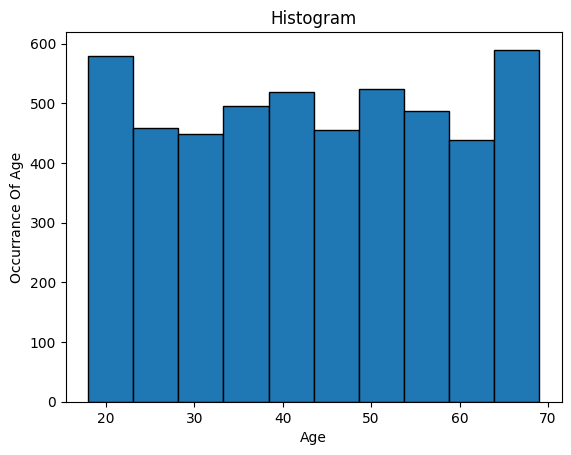

In [ ]:
# histogram
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Occurrance Of Age')
plt.title('Histogram')
plt.show()



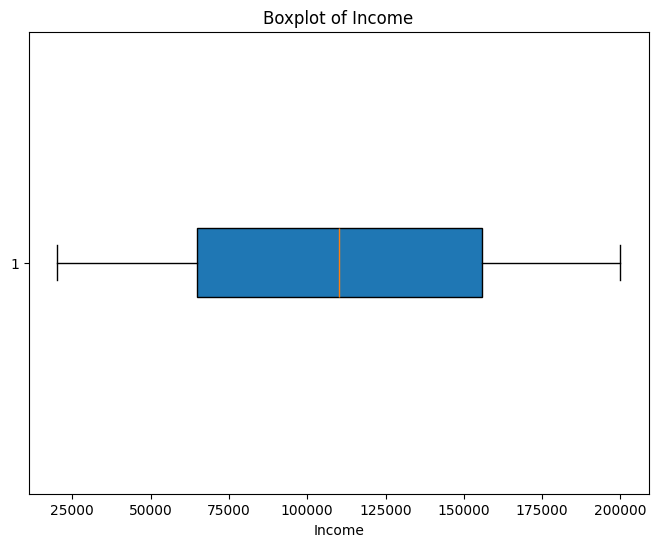

In [ ]:

#boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Income'], vert=False, patch_artist=True)
plt.xlabel('Income')
plt.title('Boxplot of Income')
plt.show()


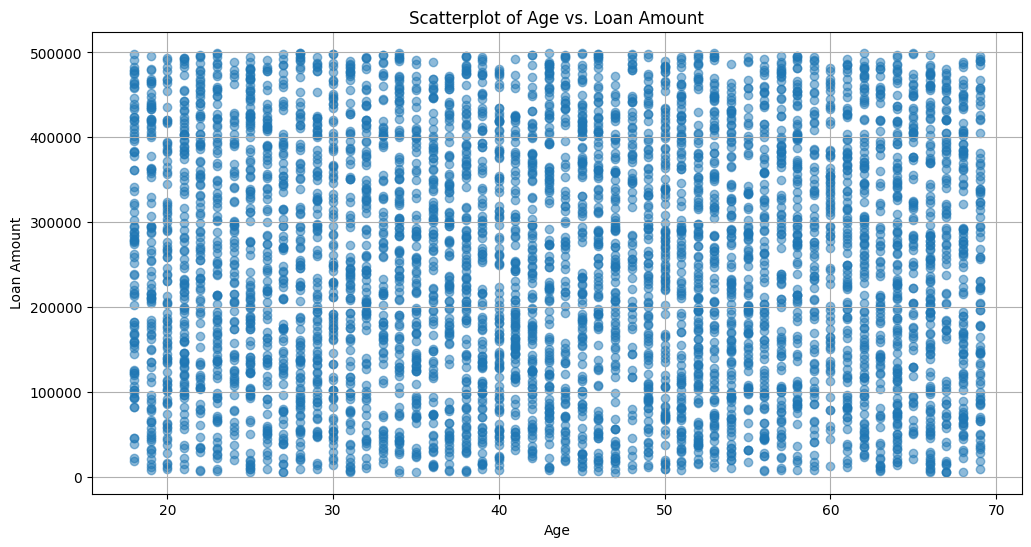

In [ ]:
#scatter diagram
plt.figure(figsize=(12, 6))
plt.scatter(df['Age'], df['Loan_Amount'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.title('Scatterplot of Age vs. Loan Amount')
plt.grid(True)
plt.show()

In [ ]:

# Normalization
numerical_features = ['Age', 'Loan_Amount', 'Credit_Score', 'Income']
scaler = StandardScaler()
scaler.fit(df[numerical_features])
df[numerical_features] = scaler.transform(df[numerical_features])
print(df)


     Applicant_ID       Age    Income  Credit_Score  Loan_Amount  Loan_Term  \
0               1  0.832265 -1.695793      0.404040     1.407277         72   
1               2  1.703719  0.305372      0.503777     0.035180         60   
2               3  0.161916 -0.256351     -0.668134    -0.180138         72   
3               4 -0.776573 -0.174538      1.102200     0.409366         12   
4               5  1.100405 -1.692471     -1.060849    -1.676760         12   
...           ...       ...       ...           ...          ...        ...   
4995         4996 -1.312852  1.140264      1.127135     0.335463         48   
4996         4997  1.502614  1.008404      1.588419    -1.657007         24   
4997         4998 -1.178782  1.089775     -0.661901     1.583210         48   
4998         4999  0.631160 -1.415921     -0.823973    -0.323622         60   
4999         5000 -0.508433  0.854304     -1.484732    -0.482658         36   

      Interest_Rate Employment_Status  Debt_to_Inco

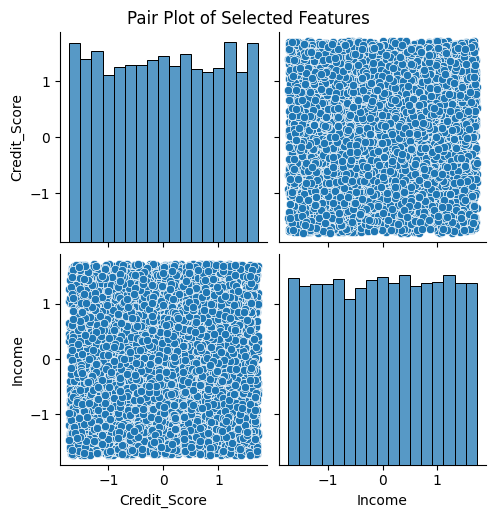

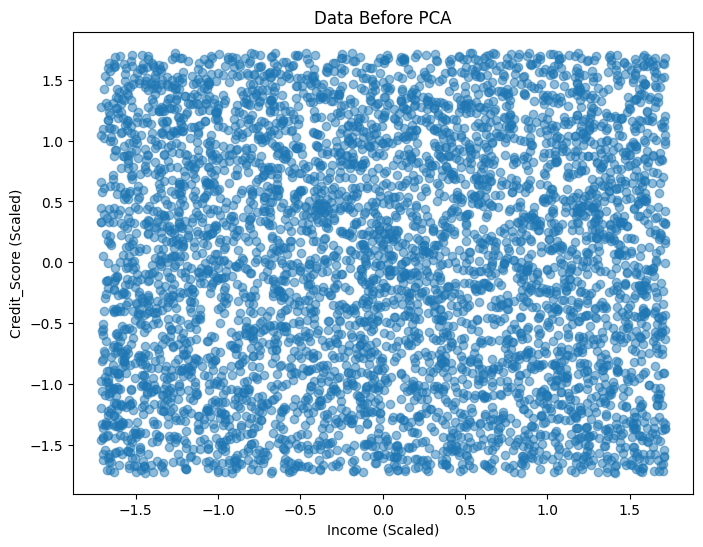

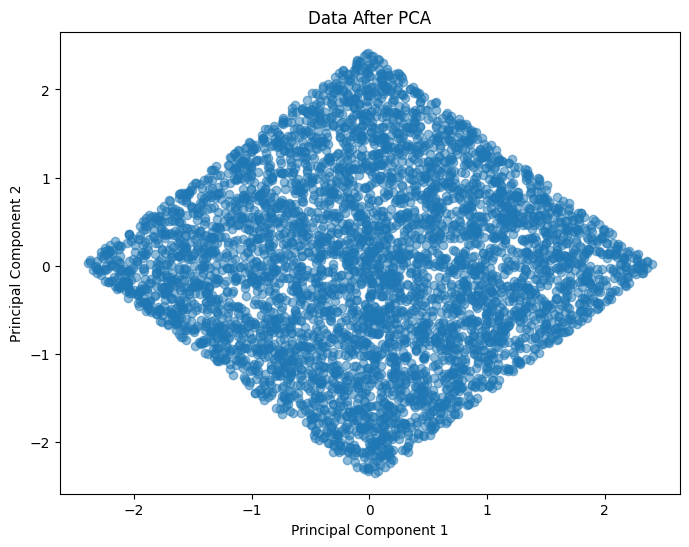

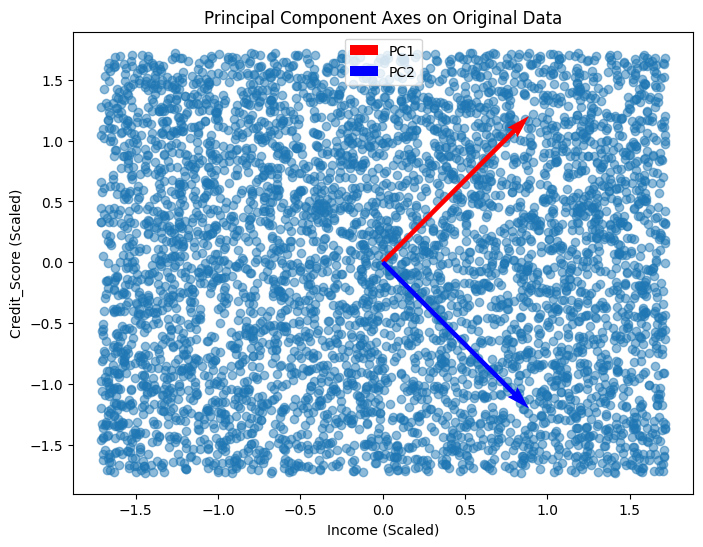

In [ ]:

# Selecting features for PCA
features = ['Credit_Score', 'Income']
X = df[features]

# Standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizing original data (Pairplot)
sns.pairplot(df[features])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

# PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot before PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
plt.xlabel('Income (Scaled)')
plt.ylabel('Credit_Score (Scaled)')
plt.title('Data Before PCA')
plt.show()

# Scatter plot after PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After PCA')
plt.show()

# Plotting Principal Component Axes
eigenvectors = pca.components_
mean = np.mean(X_scaled, axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
plt.quiver(mean[0], mean[1], eigenvectors[0, 0], eigenvectors[0, 1], color='r', scale=3, label='PC1')
plt.quiver(mean[0], mean[1], eigenvectors[1, 0], eigenvectors[1, 1], color='b', scale=3, label='PC2')
plt.xlabel('Income (Scaled)')
plt.ylabel('Credit_Score (Scaled)')
plt.title('Principal Component Axes on Original Data')
plt.legend()
plt.show()


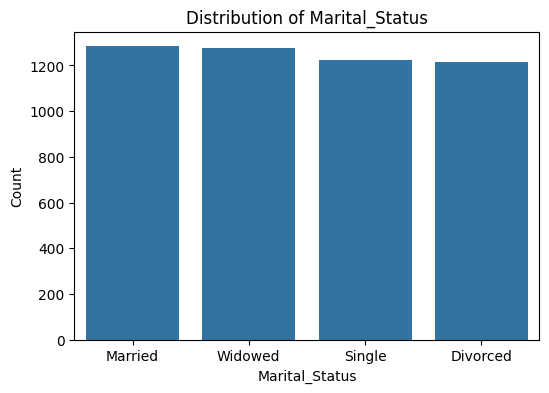

Married: 1284 (25.68%)
Widowed: 1278 (25.56%)
Single: 1225 (24.50%)
Divorced: 1213 (24.26%)
The dataset is imbalanced.


In [ ]:
# Categorical feature analysis
feature = 'Marital_Status'
gender_counts = df[feature].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title(f'Distribution of {feature}')
plt.show()

# Check dataset balance
total = gender_counts.sum()
for cat, count in gender_counts.items():
    print(f"{cat}: {count} ({count/total:.2%})")

if any(count / total < 0.4 for count in gender_counts.values):
    print("The dataset is imbalanced.")
else:
    print("The dataset is fairly balanced.")


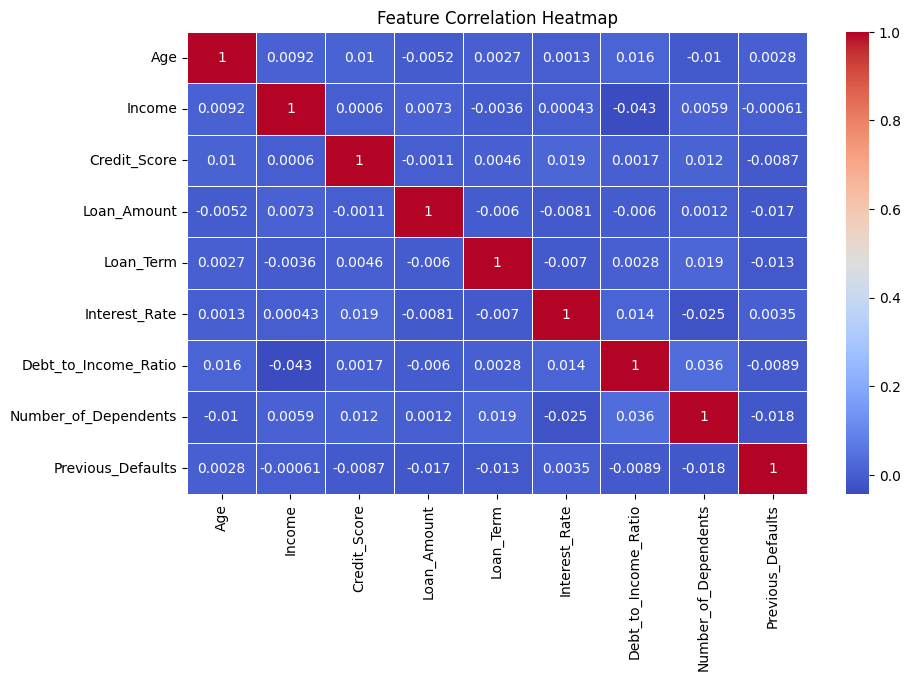

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df.select_dtypes(include=['number']).corr()
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# a) Correlation Matrix & Relevant Features
print("Correlation Matrix:")
print(corr_matrix)
relevant_features = corr_matrix.abs().unstack().sort_values(ascending=False)
print("Top Correlated Features:")
print(relevant_features[relevant_features < 1].head(10))


Correlation Matrix:
                           Age    Income  Credit_Score  Loan_Amount  \
Age                   1.000000  0.009228      0.010137    -0.005220   
Income                0.009228  1.000000      0.000600     0.007326   
Credit_Score          0.010137  0.000600      1.000000    -0.001115   
Loan_Amount          -0.005220  0.007326     -0.001115     1.000000   
Loan_Term             0.002661 -0.003589      0.004614    -0.005987   
Interest_Rate         0.001338  0.000425      0.018881    -0.008098   
Debt_to_Income_Ratio  0.016105 -0.043472      0.001723    -0.005977   
Number_of_Dependents -0.010104  0.005889      0.012144     0.001151   
Previous_Defaults     0.002799 -0.000607     -0.008667    -0.016602   

                      Loan_Term  Interest_Rate  Debt_to_Income_Ratio  \
Age                    0.002661       0.001338              0.016105   
Income                -0.003589       0.000425             -0.043472   
Credit_Score           0.004614       0.018881       

Class Distribution of employment_status:
Employment_Status
Self-Employed    1723
Employed         1666
Unemployed       1611
Name: count, dtype: int64


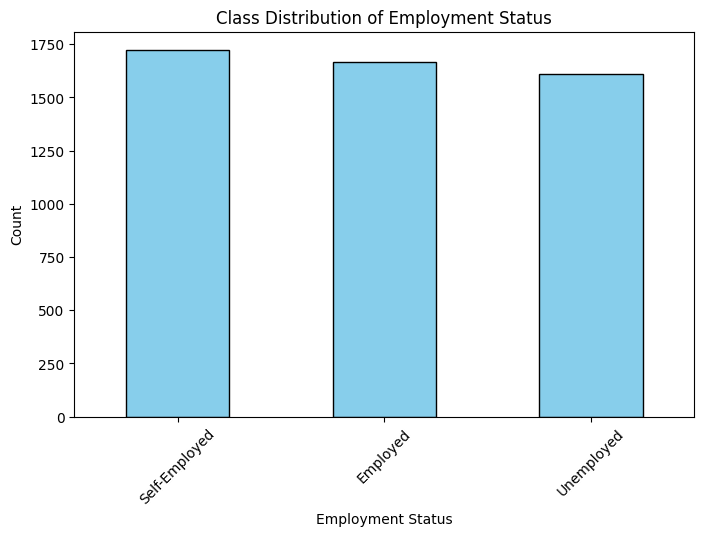

In [ ]:
    #Assuming 'employment_status' is the name of the categorical feature
    class_distribution = df['Employment_Status'].value_counts()
    print("Class Distribution of employment_status:")
    print(class_distribution)

    # analyze
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 5))
    class_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Class Distribution of Employment Status")
    plt.xlabel('Employment Status')
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# c) Feature Engineering - Creating New Feature
df['DebtToIncomeRatio'] = df['Loan_Amount'] / df['Income']
print("New Feature Created: DebtToIncomeRatio")
print(df[['Loan_Amount', 'Income', 'DebtToIncomeRatio']].head())

New Feature Created: DebtToIncomeRatio
   Loan_Amount    Income  DebtToIncomeRatio
0     1.407277 -1.695793          -0.829864
1     0.035180  0.305372           0.115205
2    -0.180138 -0.256351           0.702700
3     0.409366 -0.174538          -2.345418
4    -1.676760 -1.692471           0.990717


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
# LabelEncoder
categorical_cols = ['Employment_Status',
                    'Marital_Status', 'Property_Ownership',
                    'Loan_Purpose']
le = LabelEncoder()
for col in categorical_cols:
     df[col] = le.fit_transform(df[col])


In [ ]:
# split
X = df.drop('Previous_Defaults', axis=1)
Y = df['Previous_Defaults']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [ ]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
# 1. KNN Model
knn = KNeighborsClassifier(n_neighbors=3)  # We decided to go for 3 neighbors
knn.fit(X_train, y_train)  # Train on original data to increase accuracy
y_pred = knn.predict(X_test)  # Predict on test data
cm = confusion_matrix(y_test, y_pred) # Confusion matrix for false poisitves and false negatives
print("Confusion Matrix:\n", cm)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Precision:", precision_score(y_test, y_pred, average='binary'))
print("KNN Recall:", recall_score(y_test, y_pred, average='binary'))

Confusion Matrix:
 [[1312   34]
 [ 150    4]]
KNN Accuracy: 0.8773333333333333
KNN Precision: 0.10526315789473684
KNN Recall: 0.025974025974025976


In [ ]:
# 2. Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_balanced, y_train_balanced)  # Train on balanced data
y_pred = gnb.predict(X_test)  # Predict on test data
cm = confusion_matrix(y_test, y_pred) # Confusion matrix for false poisitves and false negatives
print("Confusion Matrix:\n", cm)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Naive Bayes Precision:", precision_score(y_test, y_pred, average='binary'))
print("Naive Bayes Recall:", recall_score(y_test, y_pred, average='binary'))

Confusion Matrix:
 [[747 599]
 [ 81  73]]
Naive Bayes Accuracy: 0.5466666666666666
Naive Bayes Precision: 0.10863095238095238
Naive Bayes Recall: 0.474025974025974


In [ ]:
# 3. Decision Tree
dtree = DecisionTreeClassifier(random_state=42)  # We used random state to not get different results every time we run
dtree.fit(X_train, y_train)  # Train on original data
y_pred = dtree.predict(X_test)  # Predict on test data
cm = confusion_matrix(y_test, y_pred) # Confusion matrix for false poisitves and false negatives
print("Confusion Matrix:\n", cm)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Precision:", precision_score(y_test, y_pred, average='binary'))
print("Decision Tree Recall:", recall_score(y_test, y_pred, average='binary'))

Confusion Matrix:
 [[1232  114]
 [ 137   17]]
Decision Tree Accuracy: 0.8326666666666667
Decision Tree Precision: 0.1297709923664122
Decision Tree Recall: 0.11038961038961038


In [ ]:
# 4. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # We used 100 estimators to avoid slowing down execution
rf.fit(X_train_balanced, y_train_balanced)  # Train on balanced data
y_pred = rf.predict(X_test)  # Predict on test data
cm = confusion_matrix(y_test, y_pred) # Confusion matrix for false poisitves and false negatives
print("Confusion Matrix:\n", cm)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Precision:", precision_score(y_test, y_pred, average='binary'))
print("Random Forest Recall:", recall_score(y_test, y_pred, average='binary'))

Confusion Matrix:
 [[1228  118]
 [ 138   16]]
Random Forest Accuracy: 0.8293333333333334
Random Forest Precision: 0.11940298507462686
Random Forest Recall: 0.1038961038961039


In [ ]:
# Bonus: Deep Learning Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Normalize the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Build and compile the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_balanced, epochs=20, batch_size=32, verbose=1)

# Predict and evaluate the deep learning model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
print("Deep Learning Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Deep Learning Accuracy:", accuracy_score(y_test, y_pred))
print("Deep Learning Precision:", precision_score(y_test, y_pred, average='binary'))
print("Deep Learning Recall:", recall_score(y_test, y_pred, average='binary'))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6068 - loss: 0.6512
Epoch 2/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7058 - loss: 0.5746
Epoch 3/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7423 - loss: 0.5425
Epoch 4/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7706 - loss: 0.4960
Epoch 5/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7775 - loss: 0.4839
Epoch 6/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8016 - loss: 0.4495
Epoch 7/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8121 - loss: 0.4286
Epoch 8/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8240 - loss: 0.4077
Epoch 9/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8332 - loss: 0.3995
Epoch 10/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8352 - loss: 0.3879
Epoch 11/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8378 - loss: 0.3807
Epoch 12/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

In [ ]:
# Best performing model:
# 	Decision Tree Metrics:
#             * Accuracy: 83.27% (High)
#             * Precision: 12.98% (Highest among all models)
#             * Recall: 11.04% (Better than KNN and Random Forest)

# We used SMOTE to balance the data set due to the large frequency of zeros compared to ones in the previous defaults label.However the only models that needed to use the balanced data were naive bayes and random forest and deep learning.We attempted to use cross validation in the beginning but the precision remained zero because the model did not test any ones.


# MODEL ASSUMPTIONS:
# K-Nearest Neighbors (KNN):
#     * Assumes that similar data points are close in feature space.

# Naive Bayes:
#     * Assumes independence between features (which is often violated in real-world data).

# Decision Trees/Random Forests:
#     * These models are non-parametric and make no assumptions about the distribution of the data.


# Data Distribution:
# The dataset provided contains information about loan applicants, including demographic, financial, and loan-related attributes. Here's a breakdown of the data distribution and key observations:
#     * Numerical Features:
#         * Variables like Age, Income, Credit_Score, Loan_Amount, Loan_Term, Interest_Rate, and Debt_to_Income_Ratio are continuous.

#     * Categorical Features:
#         * Variables like Employment_Status, Marital_Status, Property_Ownership, and Loan_Purpose are categorical.

#     * Target Variable:
#         * The target variable, Previous_Defaults, is binary (0 or 1). It is crucial to check for class imbalance. If the dataset is imbalanced (e.g., significantly more 0s than 1s), this could affect model performance and require techniques like oversampling, undersampling, or using class-weighted loss functions.
